# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
from pprint import pprint
import time
from datetime import datetime

# Import API key
from config import OWM_API_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={OWM_API_key}&units={units}&q="

In [4]:
response = requests.get(query_url + "Paris").json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 48.85, 'lon': 2.35},
 'dt': 1579228690,
 'id': 2988507,
 'main': {'feels_like': 6.27,
          'humidity': 76,
          'pressure': 1016,
          'temp': 10.63,
          'temp_max': 11.67,
          'temp_min': 10},
 'name': 'Paris',
 'sys': {'country': 'FR',
         'id': 6550,
         'sunrise': 1579246658,
         'sunset': 1579278174,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'gust': 10.3, 'speed': 5.1}}


In [21]:
Cloudiness = []
Country = []
Date = []
Humidity = []
lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

print("Beginning Data Retrieval")     
print("-----------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        Max_Temp.append(response['main']['temp_max'])
        Date.append(response['dt'])
        Lng.append(response['coord']['lon'])
        Humidity.append(response['main']['humidity'])
        Country.append(response['sys']['country'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        
        print(f"Processing Record {city}")
    except :
        print(f"City not found. Skipping...")
    time.sleep(1)



Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record havoysund
Processing Record werda
Processing Record bluff
Processing Record leh
Processing Record albany
Processing Record saint-augustin
Processing Record puerto ayora
Processing Record la libertad
Processing Record busselton
Processing Record cayenne
Processing Record sao sebastiao
Processing Record hermanus
Processing Record luderitz
Processing Record nikolskoye
Processing Record jamestown
Processing Record paamiut
Processing Record dhidhdhoo
Processing Record rikitea
Processing Record kapaa
Processing Record torbay
Processing Record avarua
Processing Record upernavik
Processing Record sangar
Processing Record tasiilaq
Processing Record vaini
Processing Record cidreira
Processing Record kajaani
City not found. Skipping...
Processing Record maua
Processing Record kununurra
City not found. Skipping...
Processing Record lorengau
Processing Record bonavista
Processing Record itambacuri
P

Processing Record egersund
Processing Record lamar
Processing Record shingu
Processing Record caravelas
Processing Record floro
Processing Record pierre
Processing Record natal
City not found. Skipping...
Processing Record yulin
Processing Record geraldton
Processing Record esperance
Processing Record fort morgan
Processing Record noumea
Processing Record taicheng
Processing Record manado
Processing Record astros
Processing Record victor harbor
Processing Record batagay-alyta
Processing Record vila franca do campo
Processing Record kalmunai
City not found. Skipping...
Processing Record narsaq
City not found. Skipping...
Processing Record pouembout
Processing Record mount isa
Processing Record salinopolis
Processing Record bestobe
Processing Record la romana
Processing Record pangnirtung
City not found. Skipping...
Processing Record ayan
Processing Record lavrentiya
Processing Record conceicao das alagoas
Processing Record owensboro
Processing Record vilyuysk
Processing Record bardiyah


City not found. Skipping...
Processing Record grindavik
Processing Record tamiahua
Processing Record morros
Processing Record abalak
Processing Record mus
City not found. Skipping...
City not found. Skipping...
Processing Record wattegama
Processing Record ovsyanka
Processing Record maldonado
Processing Record koundara
Processing Record pitimbu


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
len(cities)

612

In [55]:
city_stats = pd.DataFrame({
    "City": cities[0:567],
    "Cloudiness": Cloudiness,
    "Country": Country, 
    "Date": Date,
    "Humidity": Humidity,
    "Lat": lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
})
city_stats ["Date"] =  pd.to_datetime(city_stats ["Date"])
city_stats

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tsihombe,20,NO,1970-01-01 00:00:01.579273061,67,71.00,24.66,-6.00,0.50
1,havoysund,100,BW,1970-01-01 00:00:01.579273249,26,-25.27,23.28,28.54,8.69
2,werda,100,NZ,1970-01-01 00:00:01.579273250,92,-46.60,168.33,13.33,0.89
3,bluff,100,IN,1970-01-01 00:00:01.579273252,79,34.17,77.58,-20.37,1.40
4,leh,75,US,1970-01-01 00:00:01.579273244,55,42.60,-73.97,-9.44,4.60
...,...,...,...,...,...,...,...,...,...
562,pirogovo,40,LK,1970-01-01 00:00:01.579275885,100,6.80,81.48,25.00,1.50
563,antalaha,75,RU,1970-01-01 00:00:01.579275886,79,55.96,92.55,-6.00,5.00
564,ulaangom,0,UY,1970-01-01 00:00:01.579275866,46,-34.67,-54.92,22.00,5.10
565,tonj,0,GN,1970-01-01 00:00:01.579275889,5,12.48,-13.30,38.00,2.67


In [78]:
city_stats.to_csv('city_stats.csv',index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

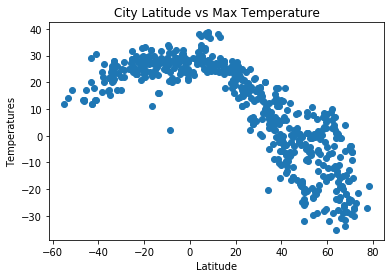

<Figure size 432x288 with 0 Axes>

In [51]:
x_values = city_stats['Lat'].astype('float')
y_values = city_stats['Max Temp'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Temperatures')
plt.title('City Latitude vs Max Temperature')


# Show plot
plt.show()
plt.savefig('LatvMaxTemp_plot.png')

#### Latitude vs. Humidity Plot

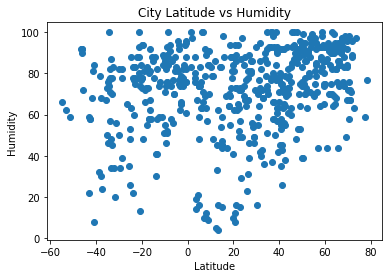

In [42]:
x_values = city_stats['Lat'].astype('float')
y_values = city_stats['Humidity'].astype('float')


# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')


# Show plot
plt.show()
plt.savefig('LatvHumidity_plot.png')

#### Latitude vs. Cloudiness Plot

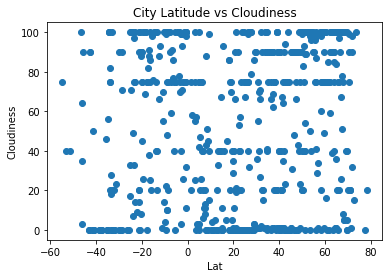

In [41]:
x_values = city_stats['Lat'].astype('float')
y_values = city_stats['Cloudiness'].astype('float')


# Plot scatter plot
plt.scatter(x_values,y_values)


# Label plot
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness')


# Show plot
plt.show()
plt.savefig('LatvCloudiness_plot.png')

#### Latitude vs. Wind Speed Plot

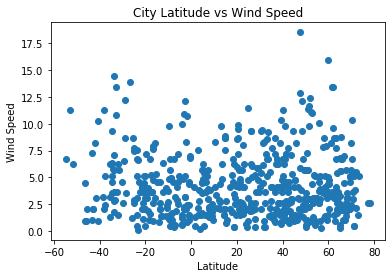

In [40]:
x_values = city_stats['Lat'].astype('float')
y_values = city_stats['Wind Speed'].astype('float')


# Plot scatter plot
plt.scatter(x_values,y_values)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')


# Show plot
plt.show()
plt.savefig('LatvWindSpeed_plot.png')

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [65]:
# Create Northern and Southern Hemisphere DataFrames

NHcity_stats = city_stats.loc[city_stats ["Lat"] >=0, :]
SHcity_stats = city_stats.loc[city_stats["Lat"]<0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: -0.8552839446120728


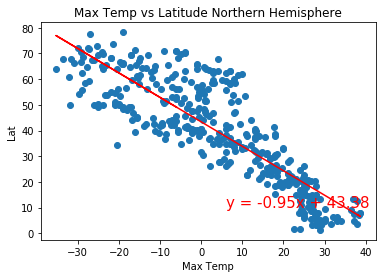

In [61]:
x_values = NHcity_stats['Max Temp'].astype('float')
y_values = NHcity_stats['Lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.title('Max Temp vs Latitude Northern Hemisphere')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('MaxTempvsLatNHplot.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.5127388646334053


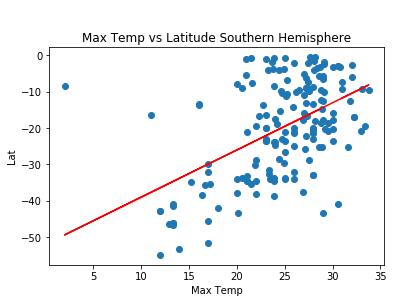

In [66]:
x_values = SHcity_stats['Max Temp'].astype('float')
y_values = SHcity_stats['Lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.title('Max Temp vs Latitude Southern Hemisphere')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('MaxTempvsLatSHplot.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.383239498597392


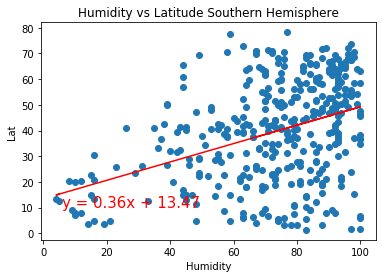

In [68]:
x_values = NHcity_stats['Humidity'].astype('float')
y_values = NHcity_stats['Lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.title('Humidity vs Latitude Northern Hemisphere')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('HumidityvsLatNHplot.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.28215592516420035


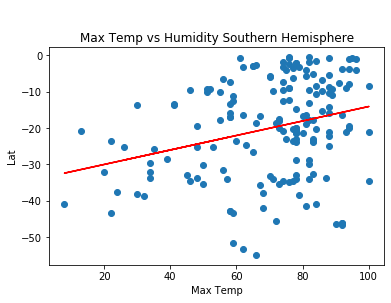

In [69]:
x_values = SHcity_stats['Humidity'].astype('float')
y_values = SHcity_stats['Lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Max Temp')
plt.ylabel('Lat')
plt.title('Max Temp vs Humidity Southern Hemisphere')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('HumidityvsLatSHplot.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.2678885400252407


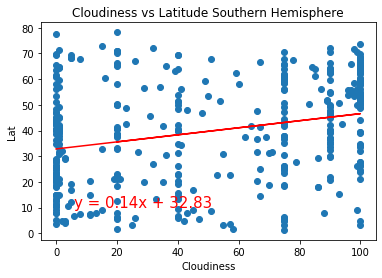

In [70]:
x_values = NHcity_stats['Cloudiness'].astype('float')
y_values = NHcity_stats['Lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.title('Cloudiness vs Latitude Northern Hemisphere')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('CloudinessvsLatNHplot.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.34231941887224004


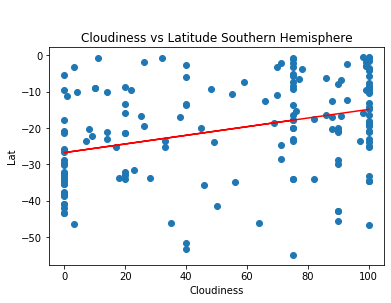

In [71]:
x_values = SHcity_stats['Cloudiness'].astype('float')
y_values = SHcity_stats['Lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.title('Cloudiness vs Latitude Southern Hemisphere')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('CloudinessvsLatSHplot.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: 0.0687528368234725


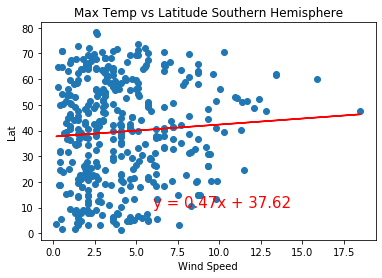

In [72]:
x_values = NHcity_stats['Wind Speed'].astype('float')
y_values = NHcity_stats['Lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.title('Wind Speed mph vs Latitude Northern Hemisphere')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('WSvsLatNHplot.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: -0.16405572607269803


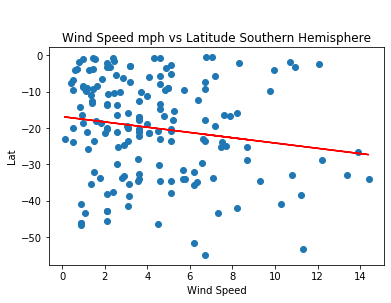

In [73]:
x_values = SHcity_stats['Wind Speed'].astype('float')
y_values = SHcity_stats['Lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.title('Wind Speed mph vs Latitude Southern Hemisphere')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
plt.savefig('WSvsLatSHplot.png')